<a href="https://colab.research.google.com/github/hallinearaujo/aula02MachineLearning/blob/main/Parte_4_Sele%C3%A7%C3%A3o_das_melhores_Features_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# AV1 PARTE 4: Engenharia de Features - Seleção das melhores Features - Breast_Cancer_Dataset
# Autor: Halline Araújo
# Data: 23/04/2023

In [4]:
#import das bibliotecas necessarias para analise de dados
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
#carregar a base de dados Breast_Cancer dentro de uma dataframe chamada dframe
dframe = pd.read_csv("Breast_cancer_data.csv")

In [10]:
#metodo head() para exibir as 10 primeiras linhas do data frame
dframe.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [11]:
#separação da base entre dados de seleção e classificação
X = dframe.iloc[:,0:20]  
y = dframe.iloc[:,-1]    

In [14]:
#aplicando agora o metodo matematico e estatistico de inferência chi2 para exibir as 3 melhores features
#apply SelectKBest class to extract top 3 best features - treinamento do modelo
#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [15]:
#exibindo o resultado da analise com os valores estatisticos de cada coluna, exibindo as 3 melhores features
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(3,'Score'))

            Specs         Score
3       mean_area  53991.655924
2  mean_perimeter   2011.102864
0     mean_radius    266.104917


In [16]:
data = pd.read_csv("Breast_cancer_data.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.06705554 0.01622223 0.06375787 0.09234937 0.01063509 0.74997988]


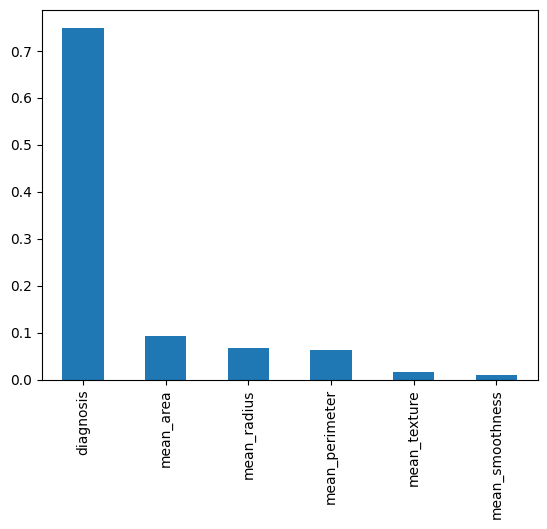

In [17]:
#metodo plot imprime o grafico de resultados
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar') 
plt.show()

In [20]:
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

dframe = pd.read_csv("Breast_cancer_data.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

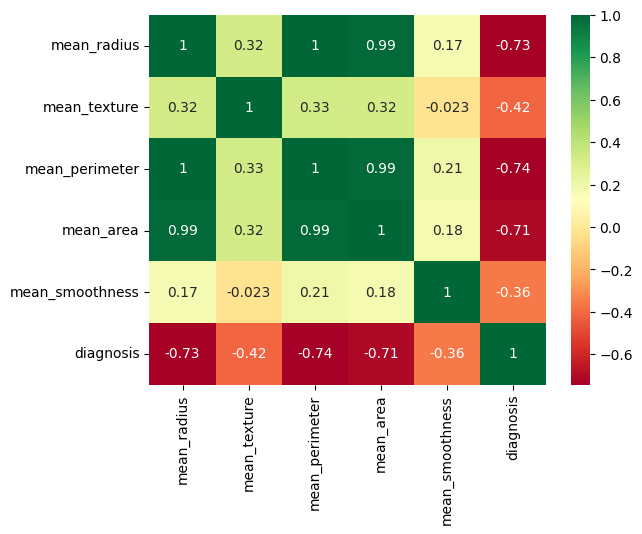

In [21]:
#plot heat map
g=sns.heatmap(dframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")